In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

In [21]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omega_index = 0 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [10]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [1, 2], skips_model=[8], skips_snapshot=[1, 2, 3],
    h_units=False)

In [11]:
%%capture
fig, axs = plt.subplots()

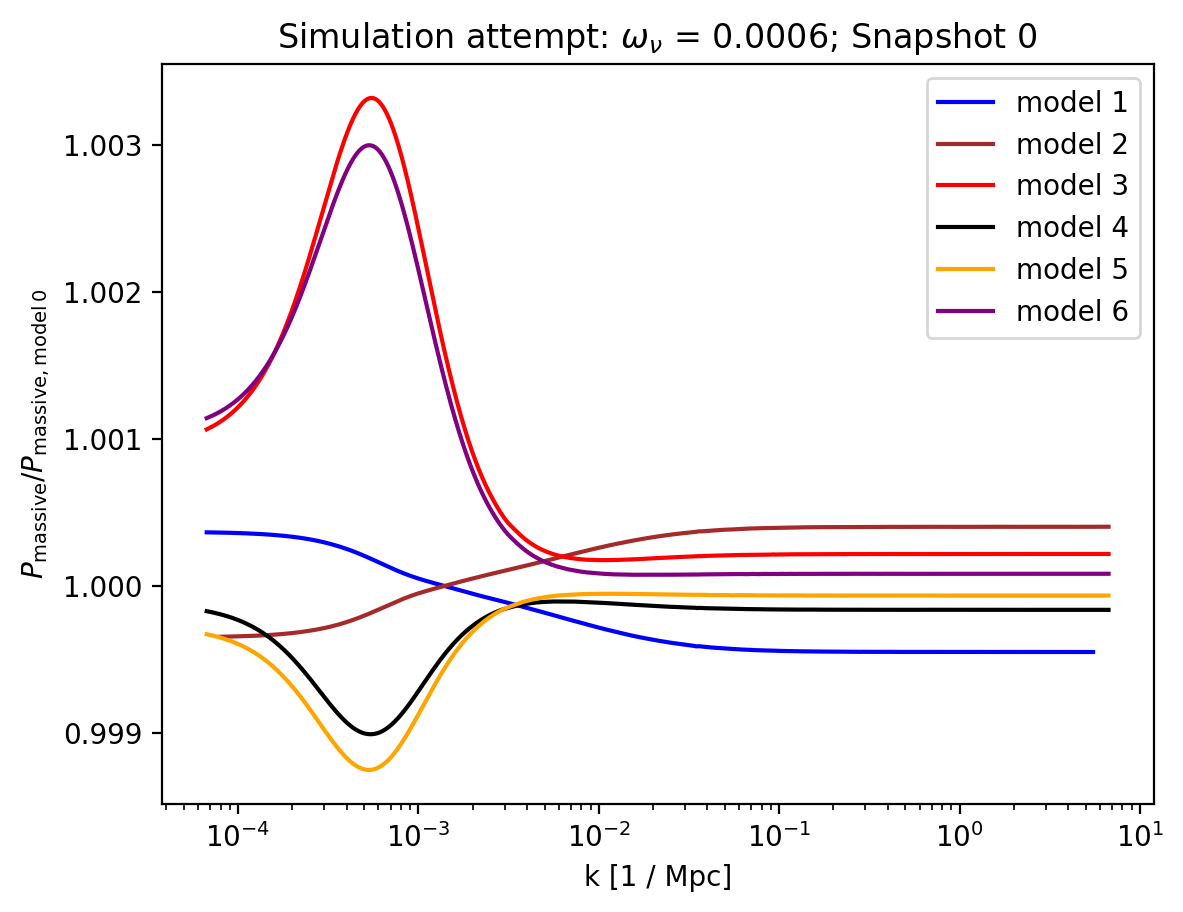

In [22]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spec_sims[onh2_str], axs,
    massive=True, skips=[7, 8], title="Simulation attempt",
    omnuh2_str=onh2_str)

In [23]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
true_asymptote = rats[1][len(rats[1]) - 1]
true_asymptote

1.000402102522777

In [48]:
# Before we throw OLS into the ring, let's start really simple:
# Find C by assuming mahogany is correct, then use the same C to predict blue
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(8)]

# We think that the form is asymptote = C * onh2 * A_s[i] / A_s[0]
C = true_asymptote / onh2 / (A_s[2] / A_s[0])
print(C)

1347.4260529373162


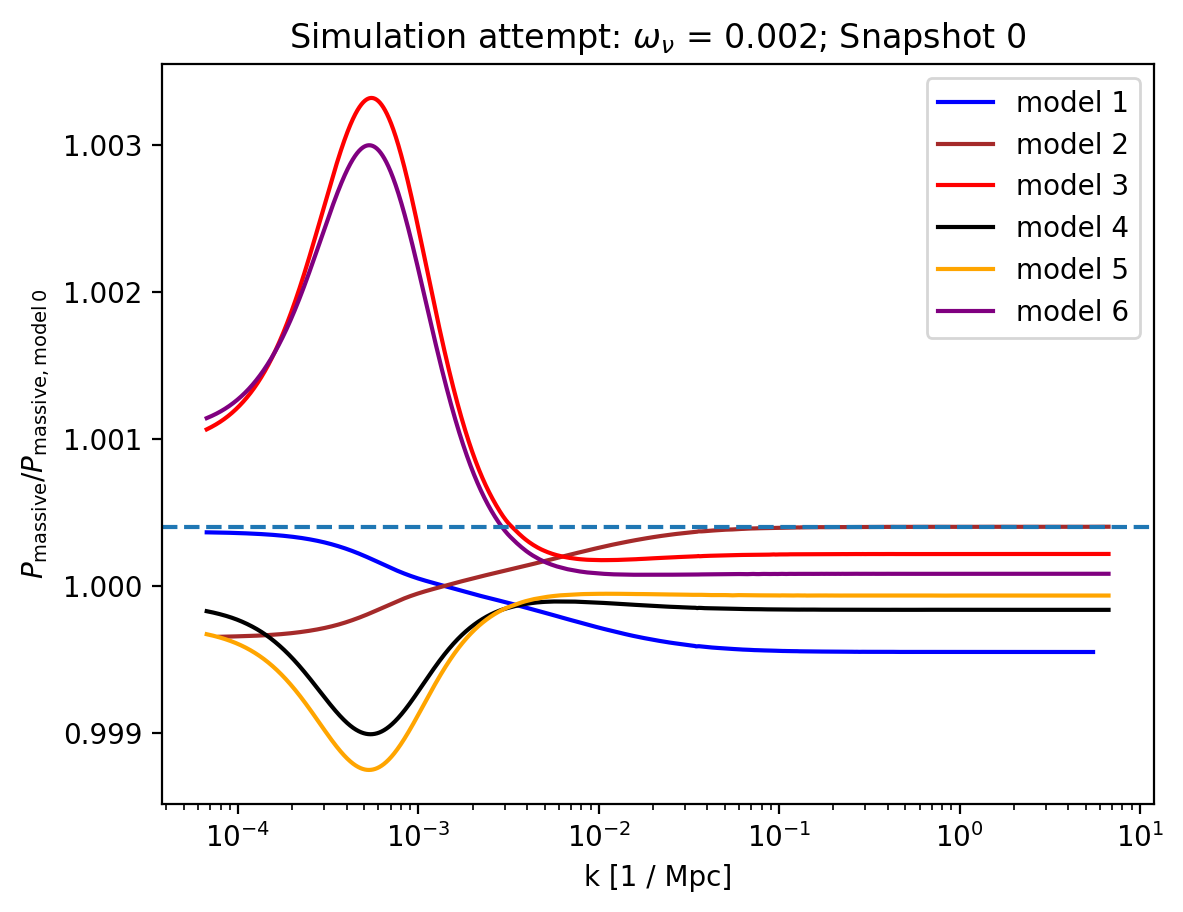

In [53]:
fig, axs = plt.subplots()
predicted_asymptotes = [C * onh2 * (A_s[i] / A_s[0]) for i in range(1, 7)]
ks, rats = spectra.model_ratios_true(0, spec_sims[onh2_str], axs,
    massive=True, skips=[7, 8], title="Simulation attempt")
#for asymptote in predicted_asymptotes:
#    axs.axhline(asymptote, linestyle='--')
axs.axhline(predicted_asymptotes[1], linestyle='--')

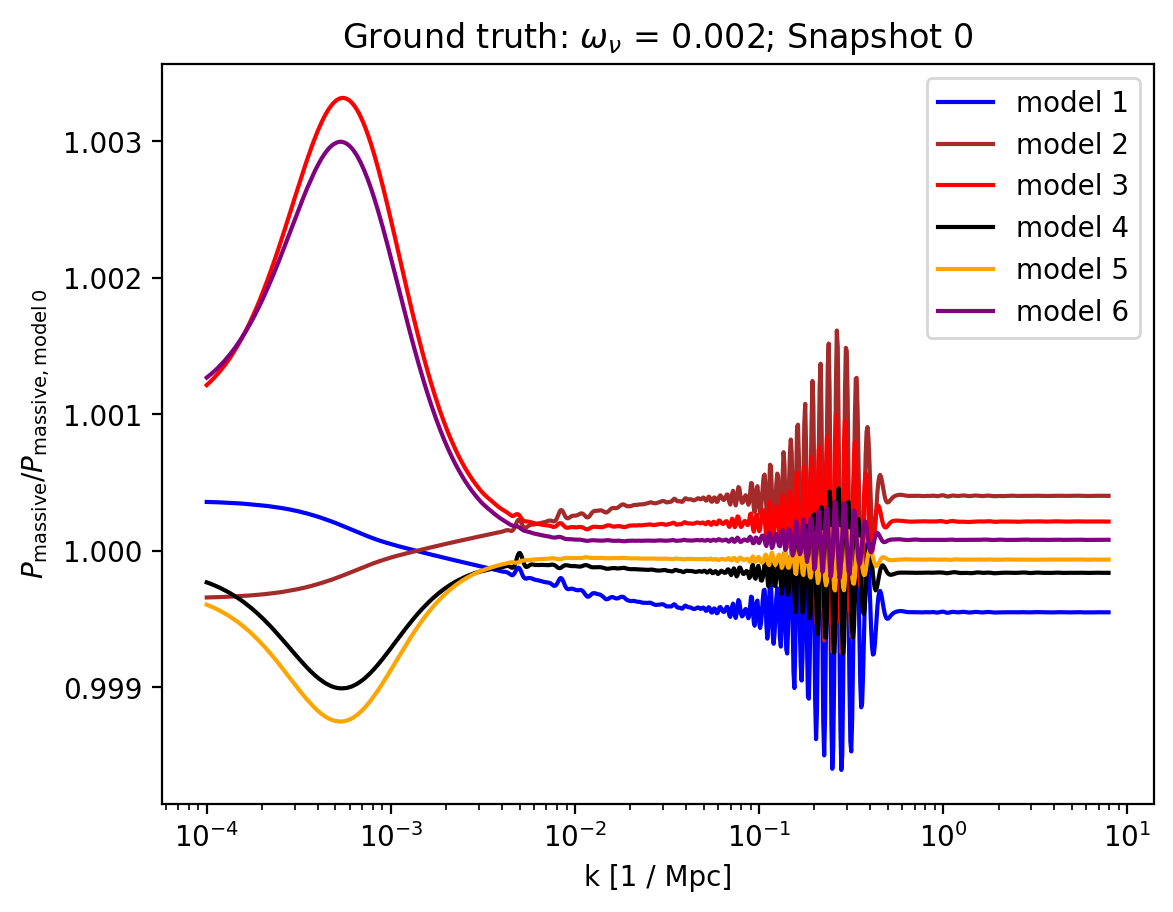

In [54]:
# What was this supposed to look like?
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spectra.powernu[onh2_str], axs,
    massive=True, skips=[7, 8])

In [55]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
true_asymptote = rats[1][len(rats[1]) - 1]
true_asymptote

1.0004021777214456

In [56]:
# Before we throw OLS into the ring, let's start really simple:
# Find C by assuming mahogany is correct, then use the same C to predict blue
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(8)]

# We think that the form is asymptote = C * onh2 * A_s[i] / A_s[0]
C = true_asymptote / onh2 / A_s[2] * A_s[0]
print(C)

1347.4261542212348


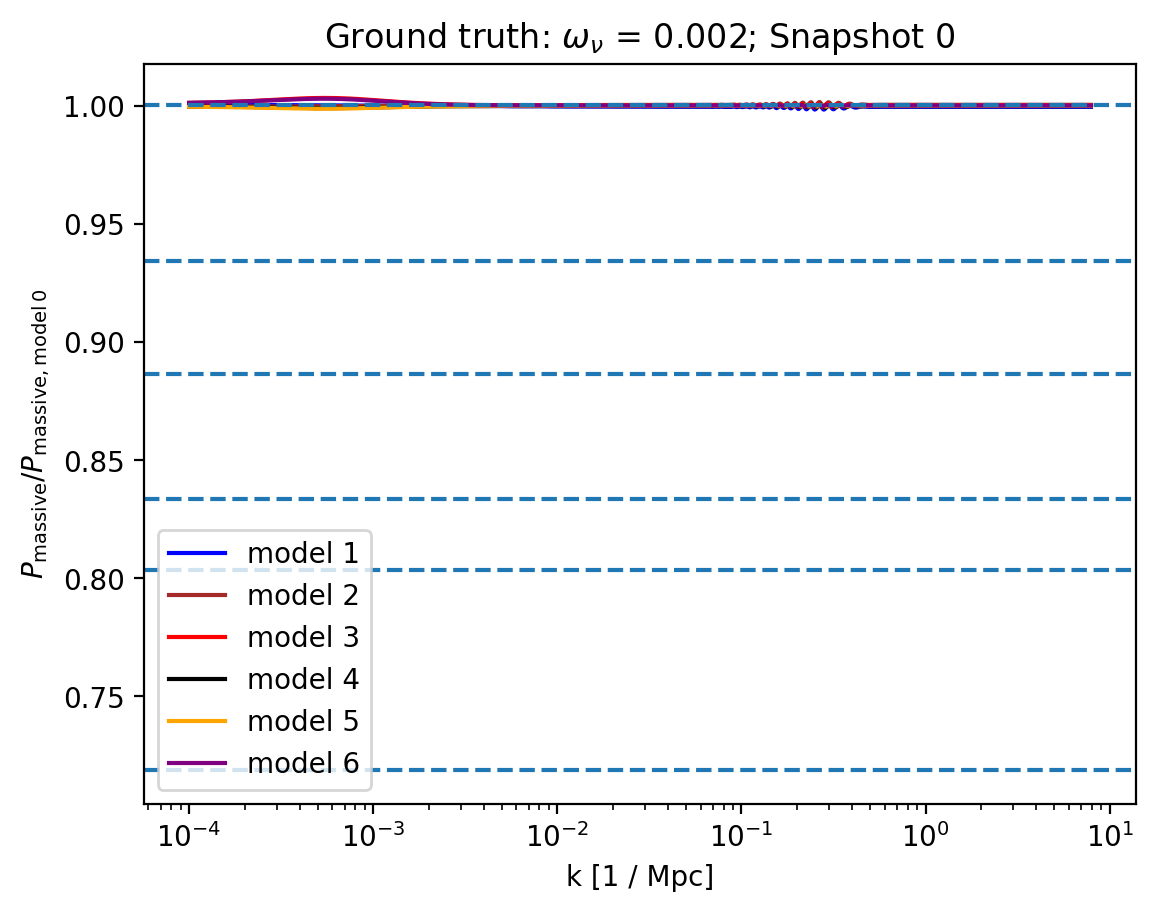

In [57]:
fig, axs = plt.subplots()
predicted_asymptotes = [C * onh2 * A_s[i] / A_s[0] for i in range(1, 7)]
ks, rats = spectra.model_ratios_true(0, spectra.powernu[onh2_str], axs,
    massive=True, skips=[7, 8])
for asymptote in predicted_asymptotes:
    axs.axhline(asymptote, linestyle='--')

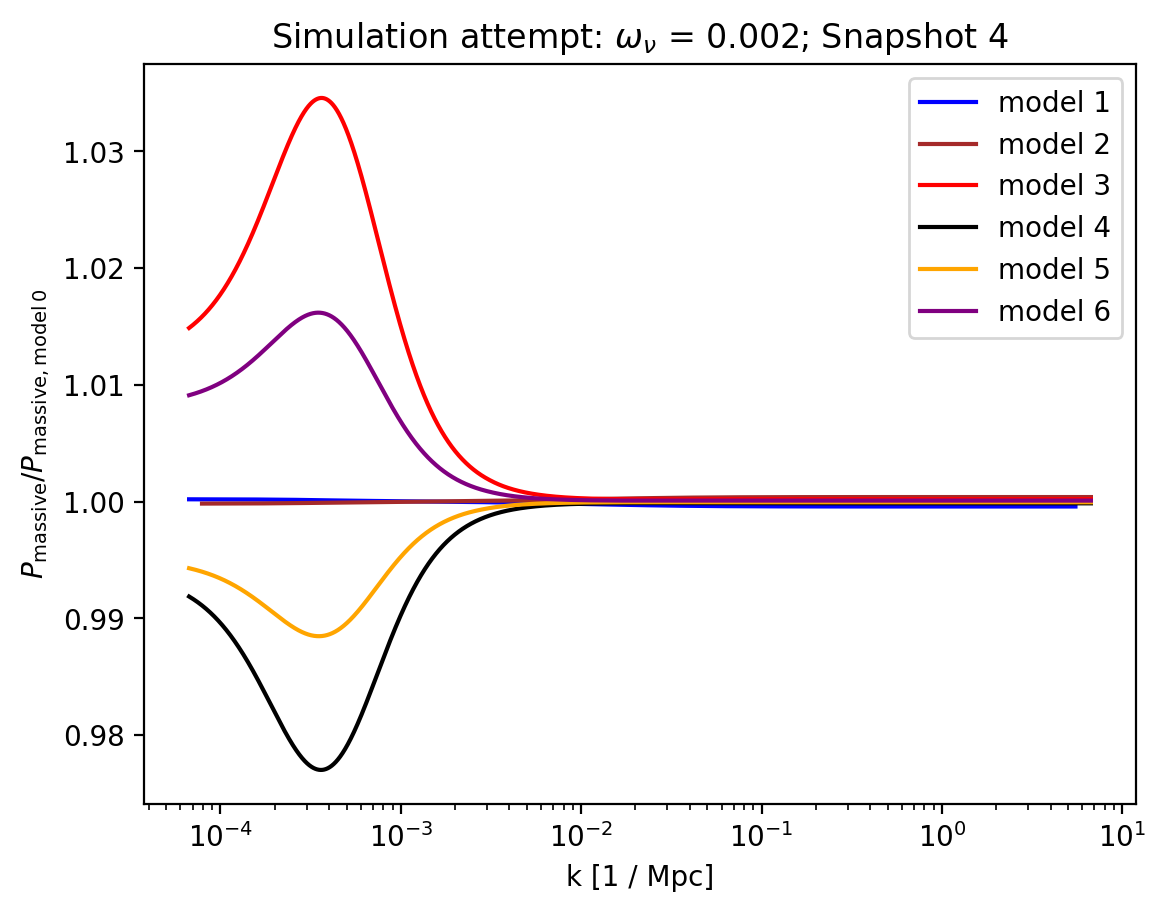

In [58]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=True, skips=[7, 8],
    title="Simulation attempt")

In [59]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
true_asymptote = rats[1][len(rats[1]) - 1]
true_asymptote

1.0003835199964655

In [60]:
# Before we throw OLS into the ring, let's start really simple:
# Find C by assuming mahogany is correct, then use the same C to predict blue
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(8)]

# We think that the form is asymptote = C * onh2 * A_s[i] / A_s[0]
C = true_asymptote / onh2 / A_s[2] * A_s[0]
print(C)

1347.401024421264


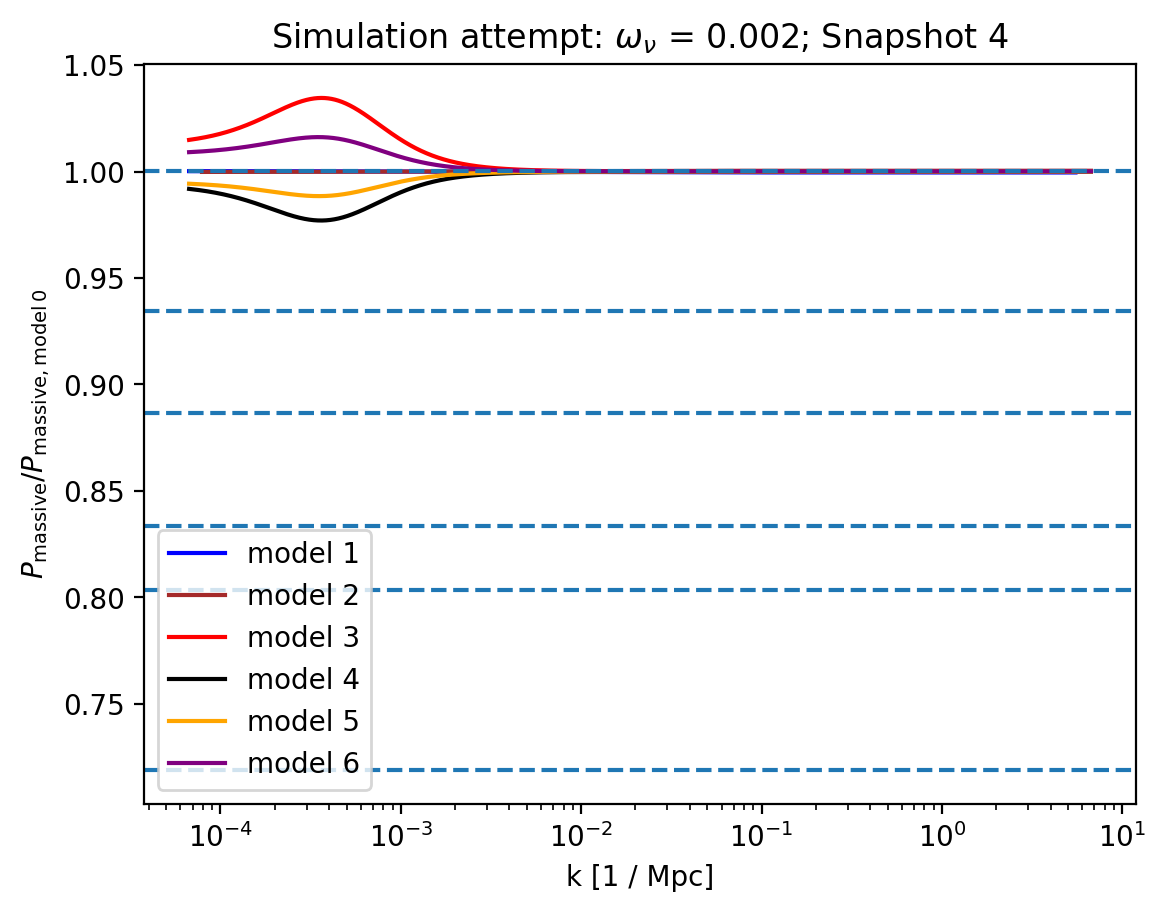

In [61]:
fig, axs = plt.subplots()
predicted_asymptotes = [C * onh2 * A_s[i] / A_s[0] for i in range(7)]
ks, rats = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=True, skips=[7, 8],
    title="Simulation attempt")
for asymptote in predicted_asymptotes[1:]:
    axs.axhline(asymptote, linestyle='--')

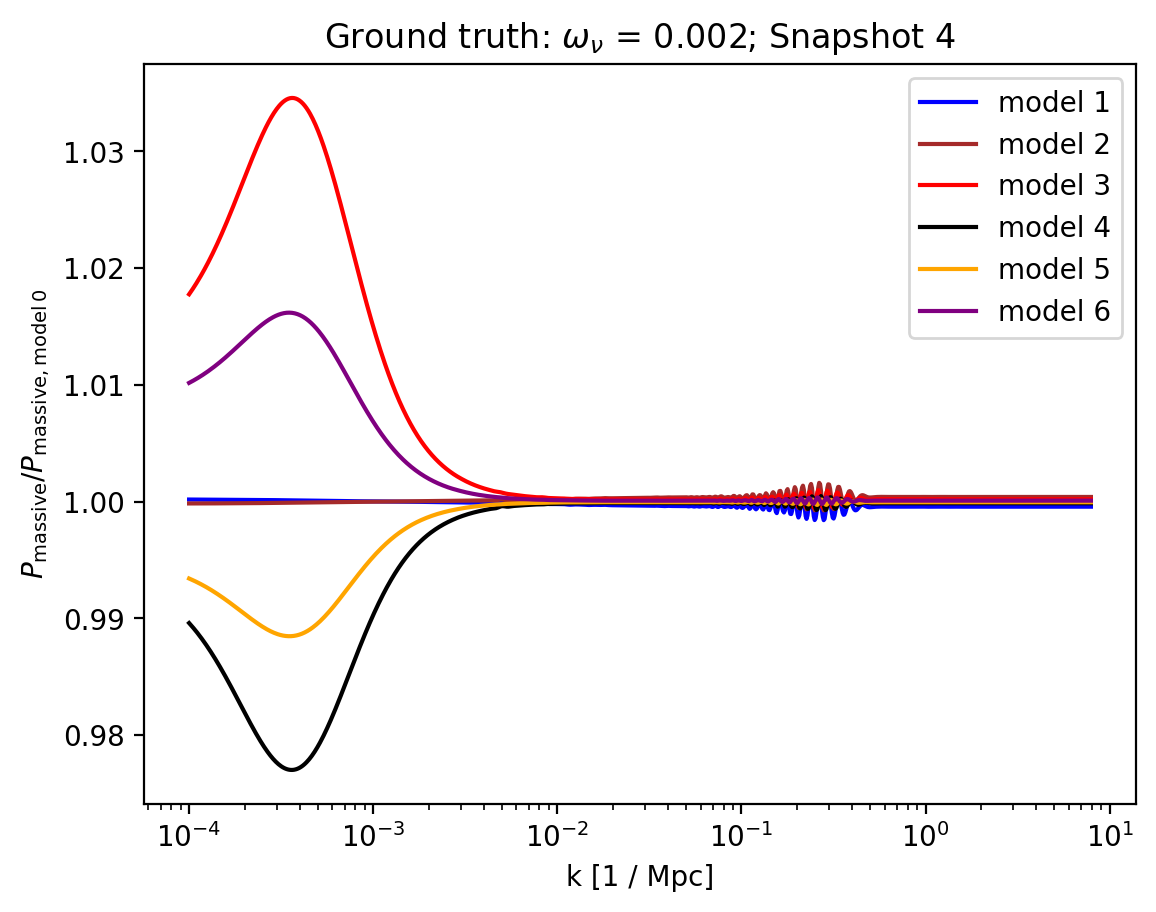

In [68]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive=True, skips=[7, 8]);

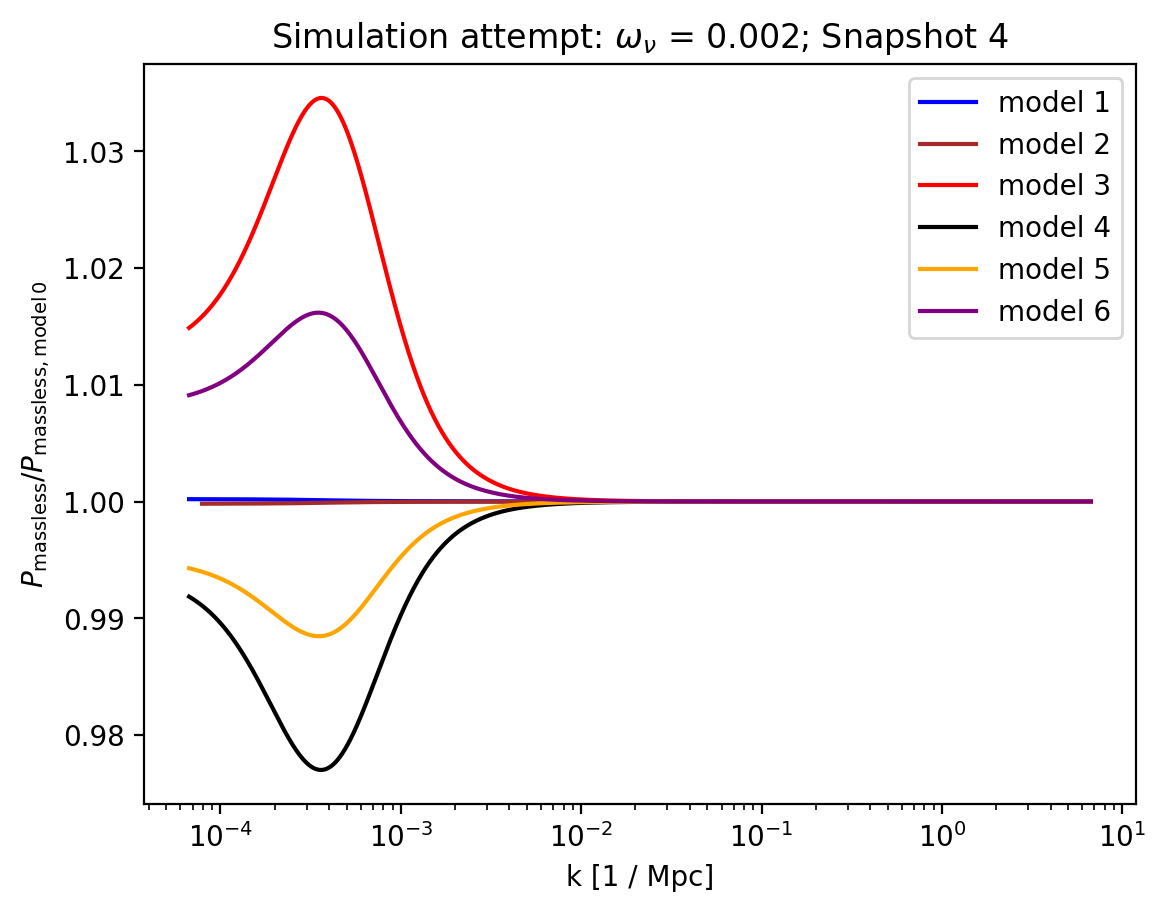

In [63]:
fig, axs = plt.subplots()
_, _ = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=False,
    skips=[7, 8], title="Simulation attempt")

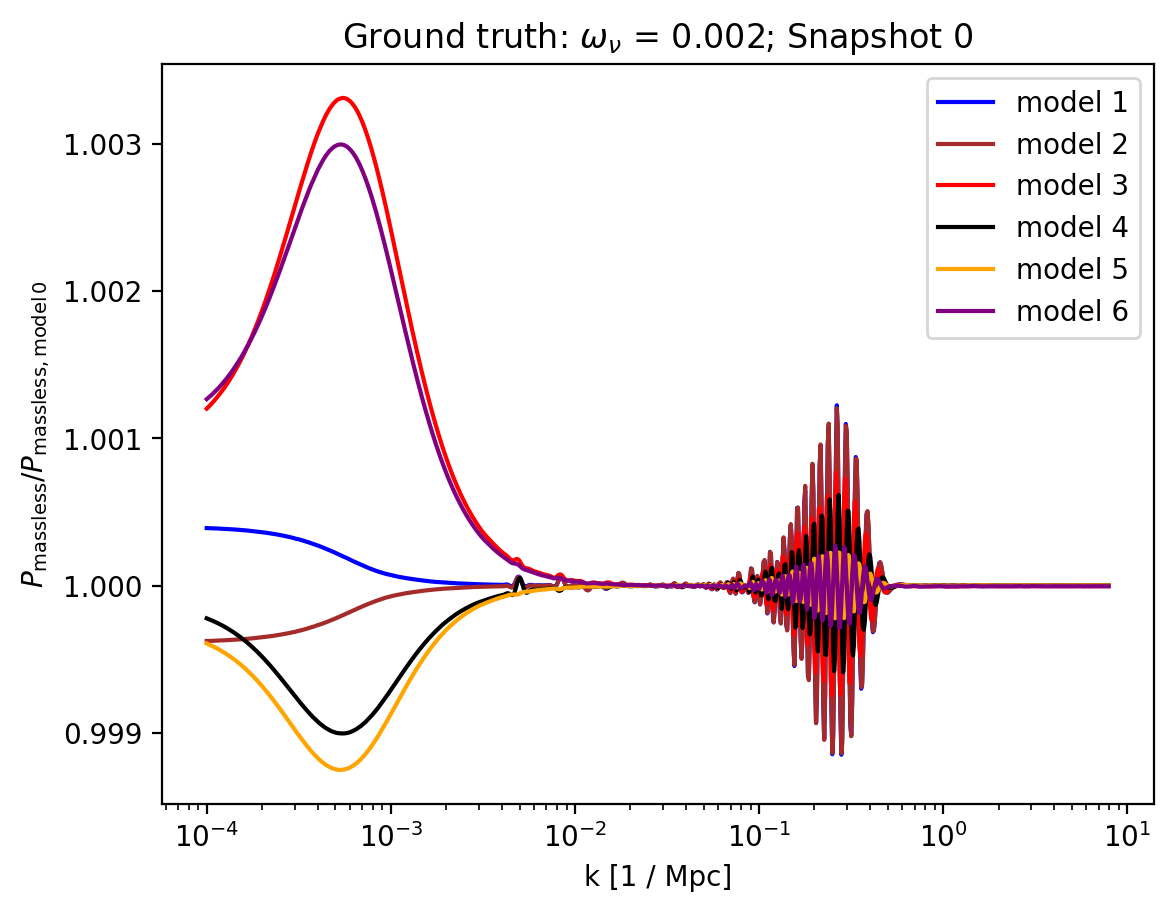

In [67]:
fig, axs = plt.subplots()
_, _ = spectra.model_ratios_true(0, spectra.powernu[onh2_str], axs,
    massive=False, skips=[7, 8])

NameError: name 'k_massless_list' is not defined

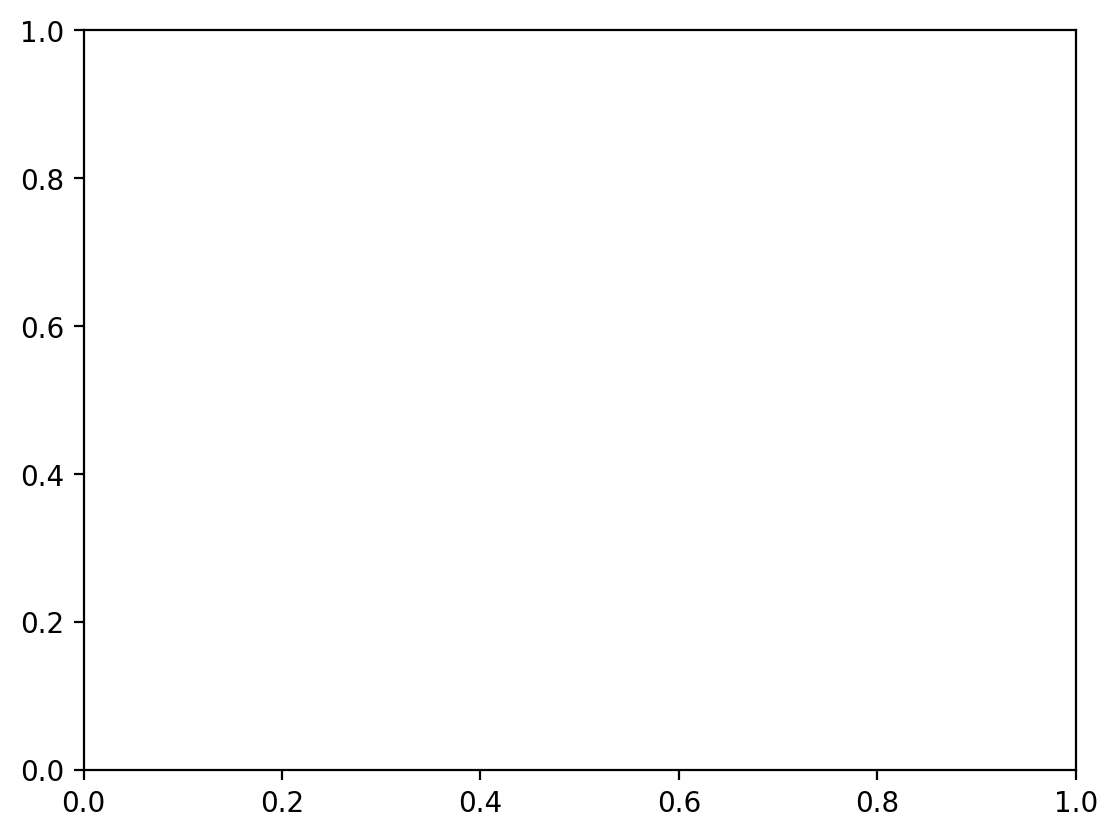

In [65]:
fig, axs = plt.subplots()
spectra.model_ratios_old(
    k_massless_list, p_massless_list, 4, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + str(onh2) + "; " + \
    "Snapshot 0", skips=[7, 8])

In [ ]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive=False, skips=[7, 8])

In [ ]:
x_list = []
for i in range(len(p_massive_list)):
    x_list.append(p_massive_list[i] / p_massless_list[i])

## 